In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
import random
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# covid 19 데이터를 불러온다.
x = np.load('./covid_19_data/x.npy')
y = np.load('./covid_19_data/y.npy')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=True,random_state=1004)

In [23]:
'''test_idx = random.sample(range(len(x)),int(0.3*len(x)))
x_test = x[test_idx,:,:]
x_train = np.delete(x, test_idx, axis=0)
y.shape
y_test = y[test_idx,:]
y_train = np.delete(y, test_idx, axis=0)
'''
x_train = x_train.reshape(len(x_train), 224,224,1)
x_test = x_test.reshape(len(x_test), 224,224,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
import tensorflow as tf

model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5) , padding="same", input_shape=(224,224,1)))
model.add(Activation("relu"))
model.add(AveragePooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (5,5) , padding="same"))
model.add(Activation("relu"))
model.add(AveragePooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())
    
model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(3, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 6)       156       
_________________________________________________________________
activation_16 (Activation)   (None, 224, 224, 6)       0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 16)      2416      
_________________________________________________________________
activation_17 (Activation)   (None, 112, 112, 16)      0         
_________________________________________________________________
average_pooling2d_9 (Average (None, 56, 56, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)            

In [26]:
adam = optimizers.Adam(lr = 0.003)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [27]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
300/300 [==============================] - 18s 35ms/step - loss: 0.8744 - accuracy: 0.7248 - val_loss: 0.2243 - val_accuracy: 0.9228
Epoch 2/10
300/300 [==============================] - 5s 17ms/step - loss: 0.1829 - accuracy: 0.9321 - val_loss: 0.1755 - val_accuracy: 0.9399
Epoch 3/10
300/300 [==============================] - 5s 17ms/step - loss: 0.1300 - accuracy: 0.9443 - val_loss: 0.1273 - val_accuracy: 0.9549
Epoch 4/10
300/300 [==============================] - 5s 17ms/step - loss: 0.1104 - accuracy: 0.9570 - val_loss: 0.1171 - val_accuracy: 0.9633
Epoch 5/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0493 - accuracy: 0.9805 - val_loss: 0.1496 - val_accuracy: 0.9624
Epoch 6/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0462 - accuracy: 0.9866 - val_loss: 0.1160 - val_accuracy: 0.9687
Epoch 7/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.1173 - val_accuracy: 0.962

In [28]:
results = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: ', results[1])

161/161 [==============================] - 1s 8ms/step - loss: 0.2723 - accuracy: 0.9560
Test accuracy:  0.955962598323822


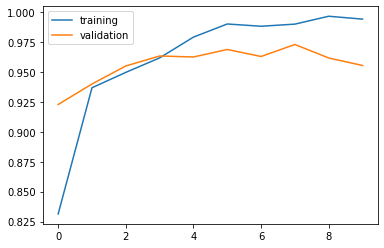

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()